In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-16 14:16:45.880624
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 26.55594801902771 seconds. That means the whole run will probably take 79.66784405708313 more seconds and 1.3277974009513855 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleN

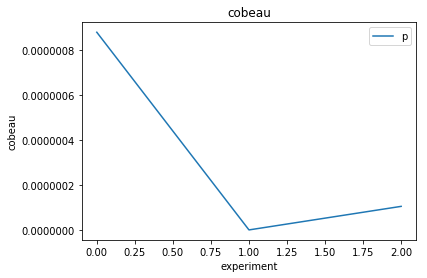

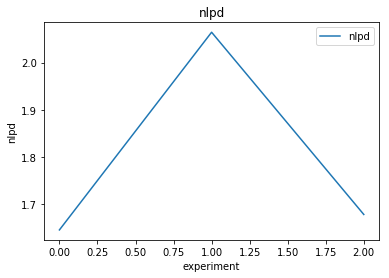

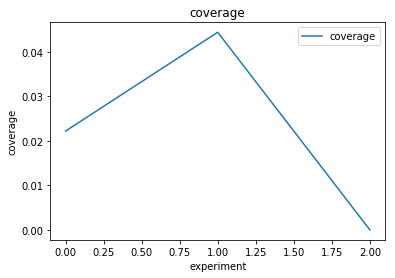

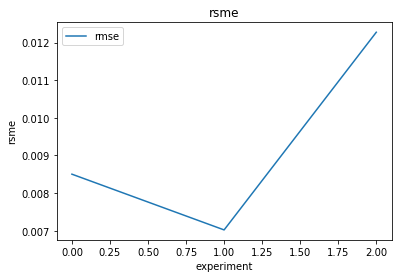

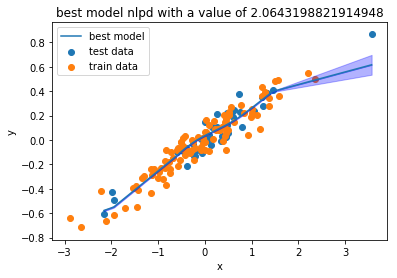

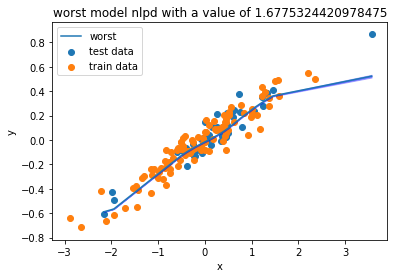

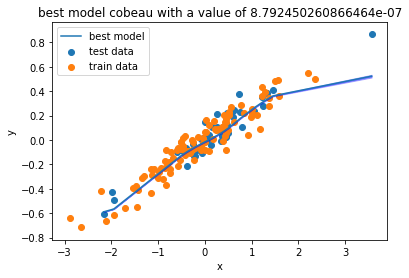

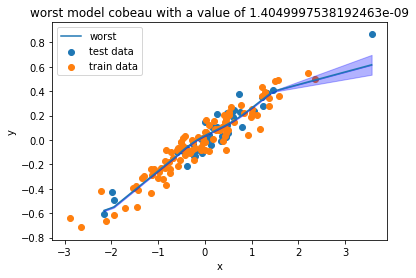

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-16 14:18:10.596528
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 58.501688718795776 seconds. That means the whole run will probably take 175.50506615638733 more seconds and 2.9250844359397887 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 179.21725392341614 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000       3.0   3.000000  3.000000
mean   0.210290       0.0 -14.894224  0.007528
std    0.244389       0.0   5.091708  0.001042
min    0.000016      

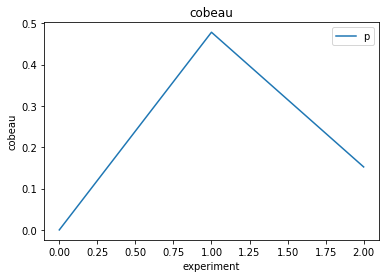

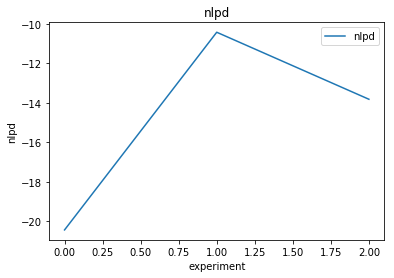

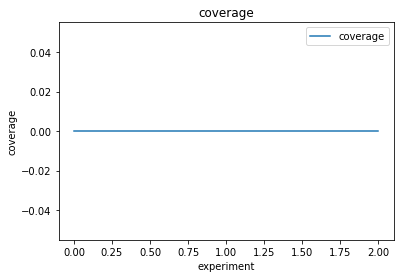

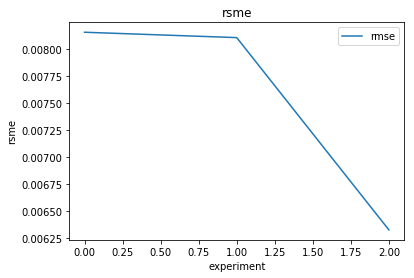

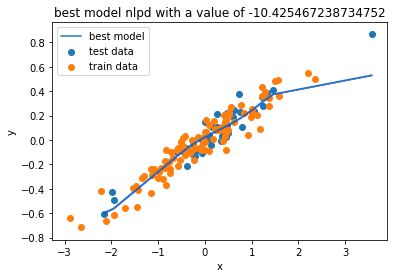

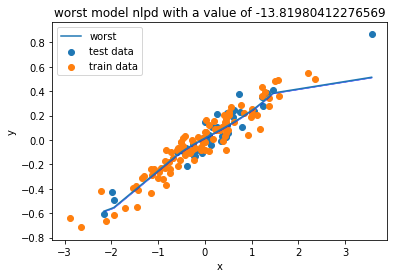

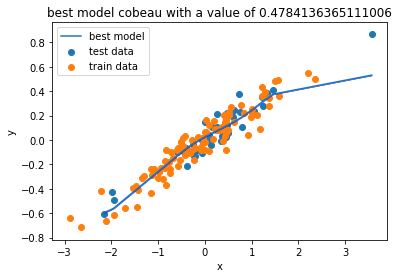

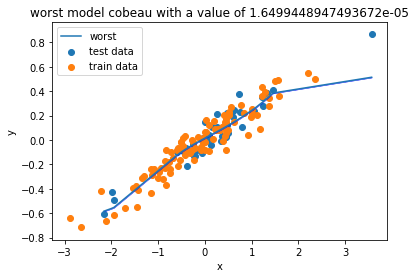

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-16 14:21:15.534422
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 69.66083407402039 seconds. That means the whole run will probably take 208.98250222206116 more seconds and 3.4830417037010193 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 206.45237278938293 seconds with 3 experiments
             cobeau  coverage       nlpd      rsme
count  3.000000e+00  3.000000   3.000000  3.000000
mean   4.954025e-01  0.007407 -10.050894  0.007665
std    4.295769e-01  0.012830   4.640993  0.001263
min

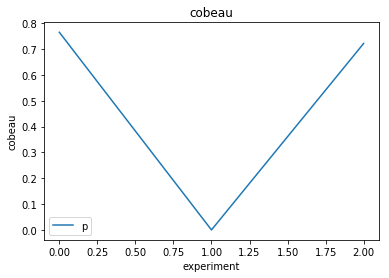

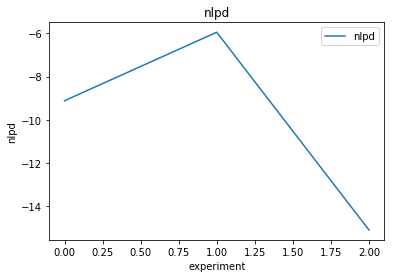

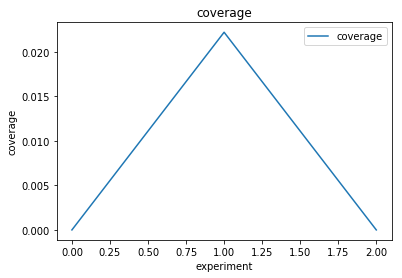

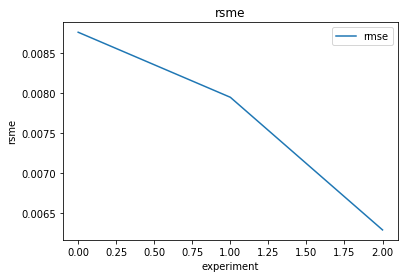

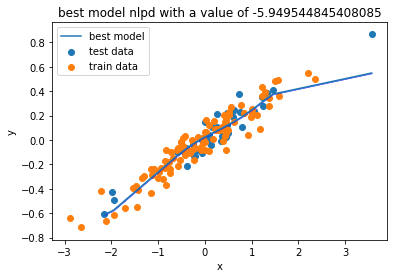

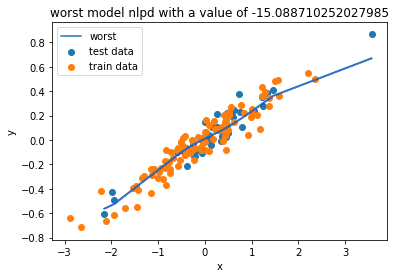

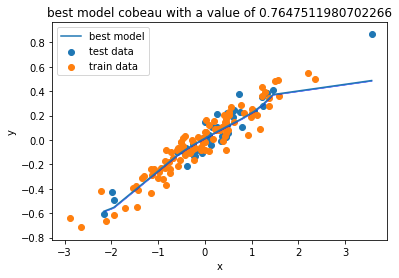

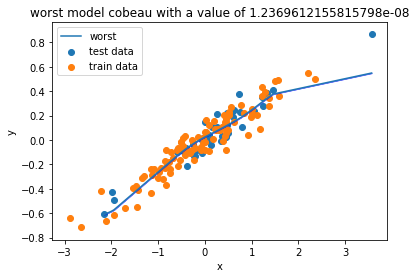

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-16 14:24:47.312709
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 36.23912715911865 seconds. That means the whole run will probably take 108.71738147735596 more seconds and 1.8119563579559326 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.Ensemble

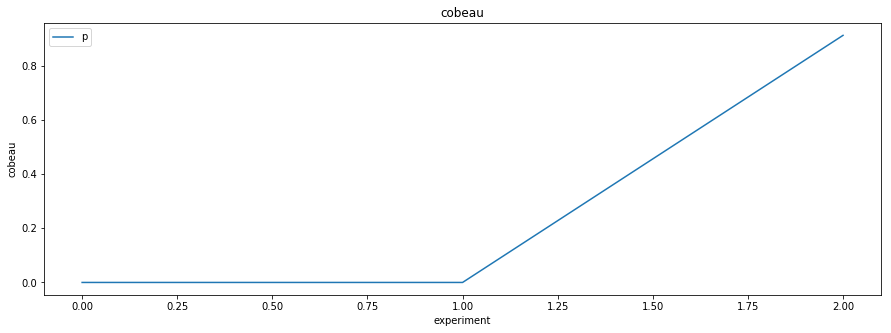

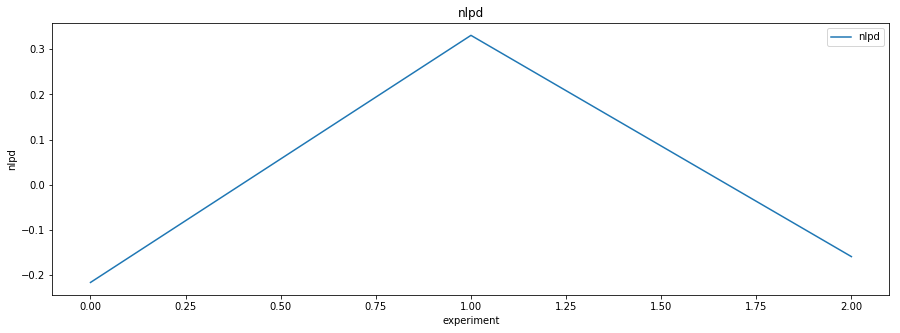

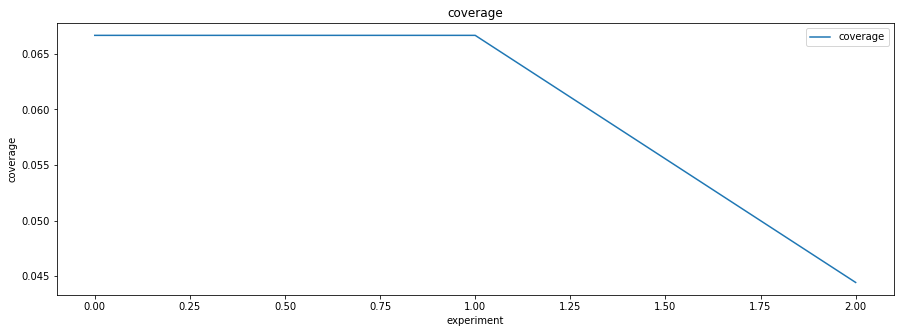

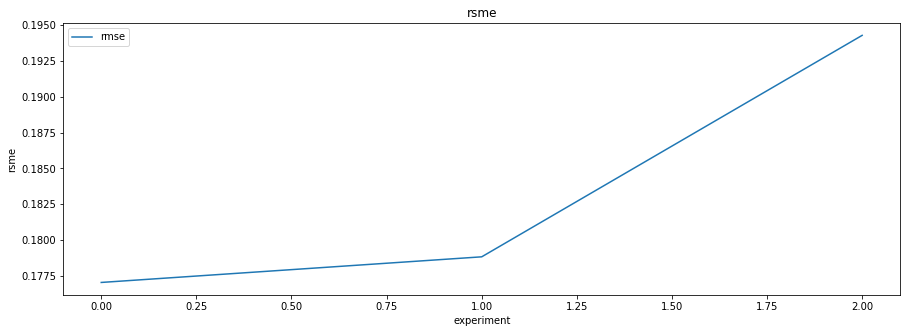

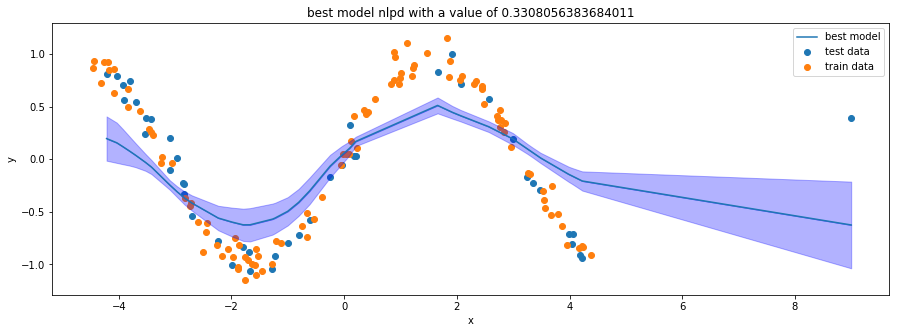

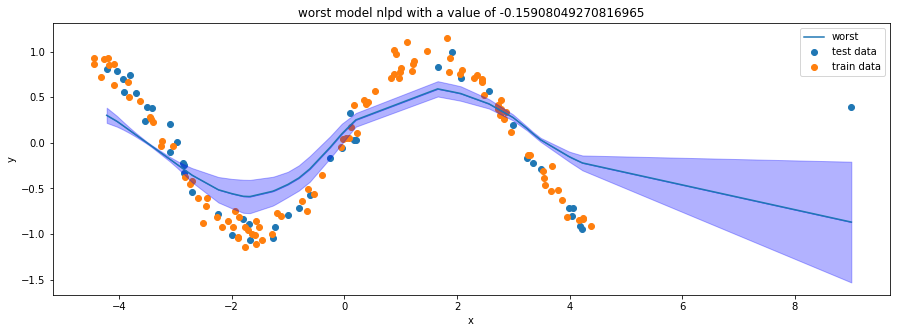

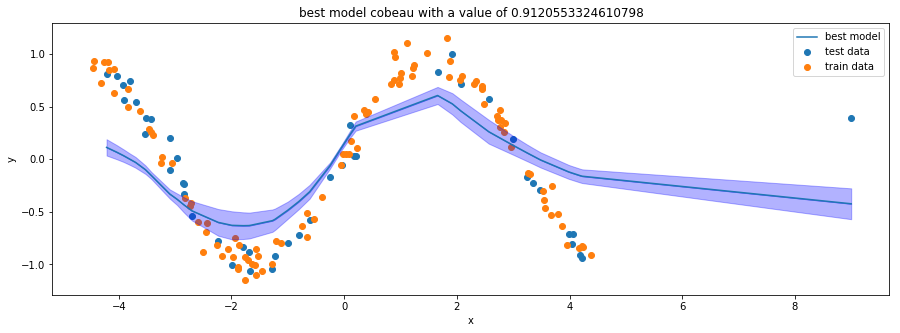

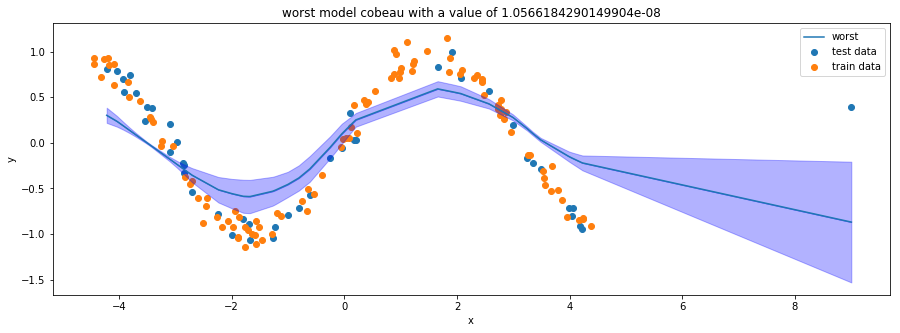

In [7]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-16 14:26:41.193541
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 108.06541681289673 seconds. That means the whole run will probably take 324.1962504386902 more seconds and 5.403270840644836 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 357.9578080177307 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   9.424802e-02  0.103704 -5.866630  0.107547
std    1.131899e-01  0.071434  1.872267  0.025716
min    1.081

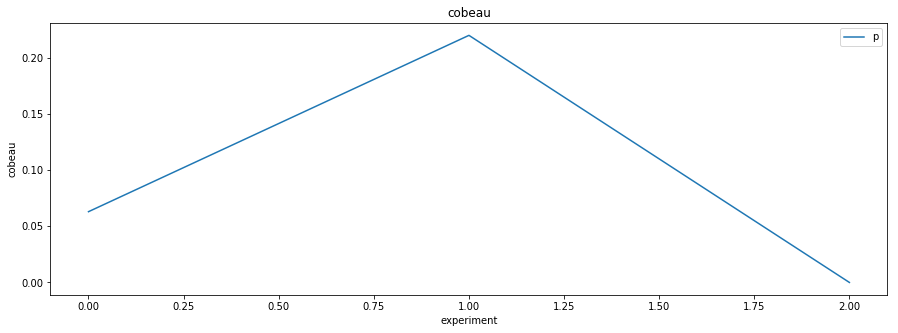

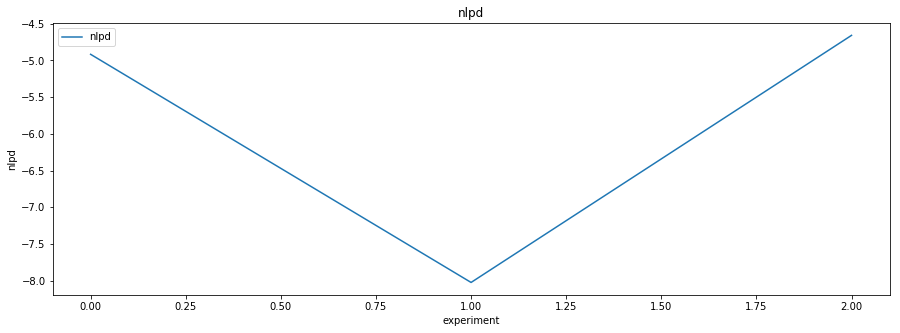

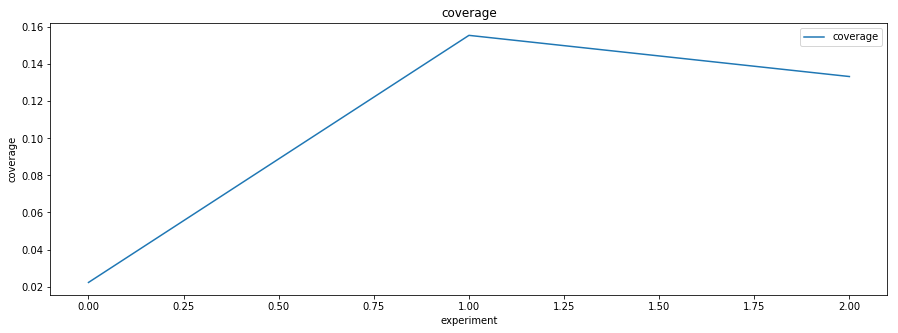

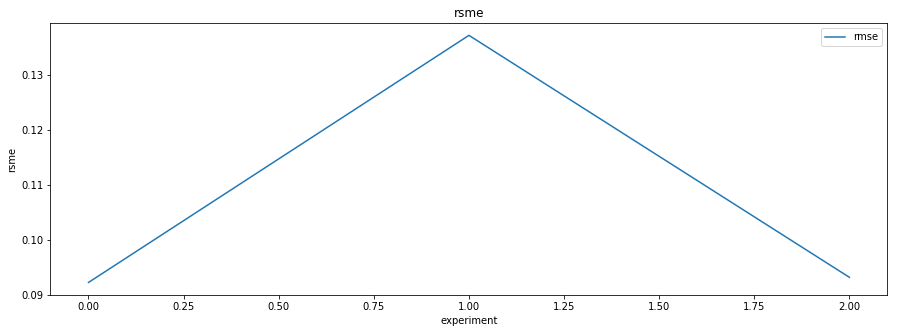

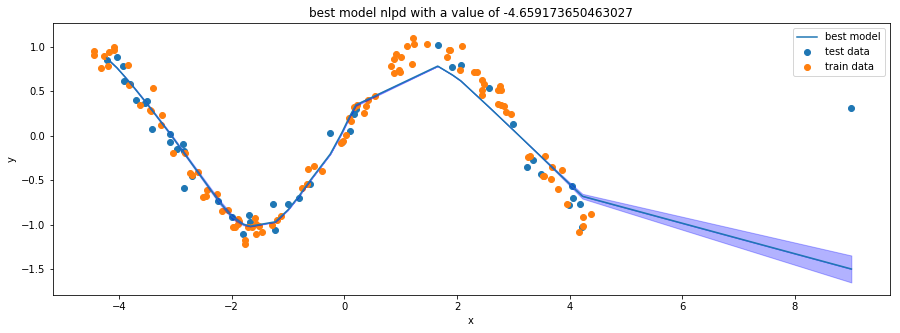

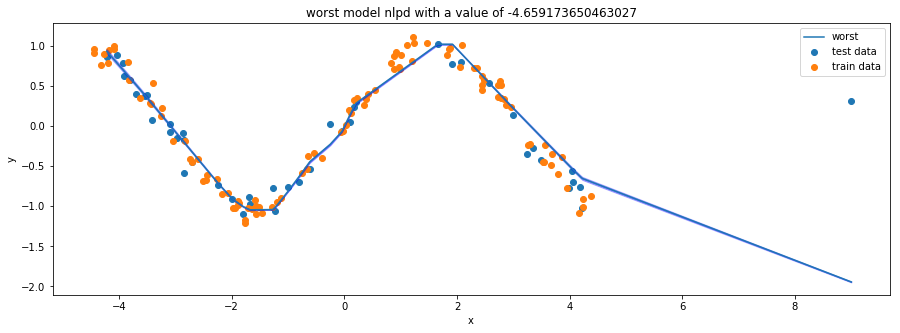

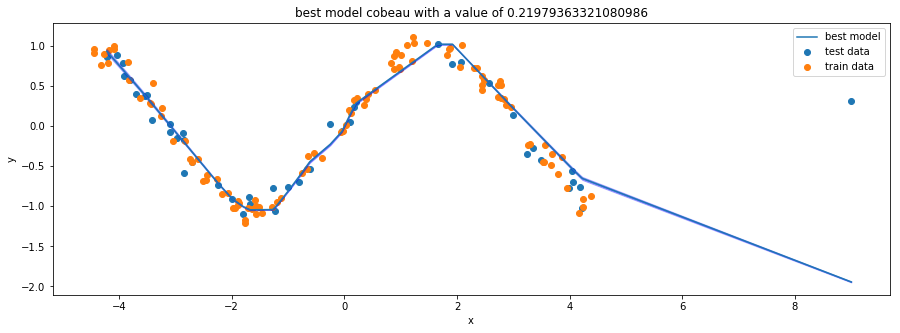

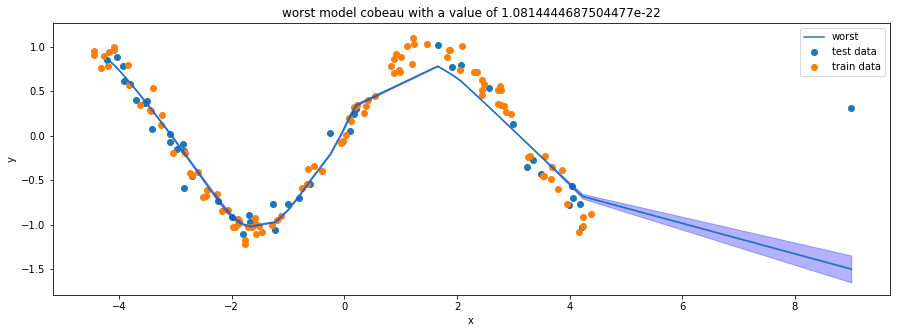

In [8]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-16 14:32:45.313110
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 115.74552297592163 seconds. That means the whole run will probably take 347.2365689277649 more seconds and 5.7872761487960815 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 369.19710421562195 seconds with 3 experiments
             cobeau  coverage       nlpd      rsme
count  3.000000e+00  3.000000   3.000000  3.000000
mean   3.342504e-01  0.044444  -6.587719  0.153192
std    3.990991e-01  0.022222   8.952969  0.009483
min

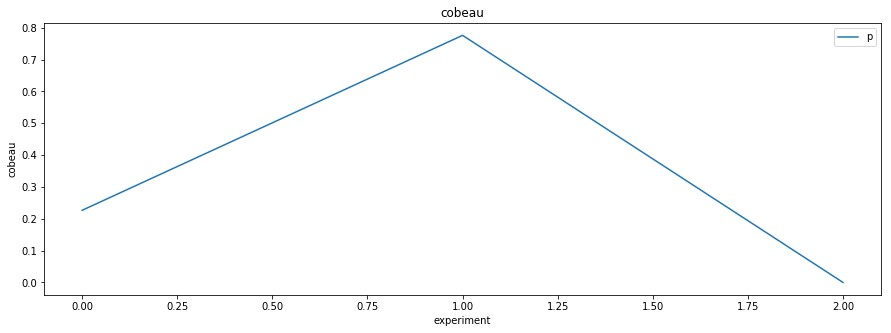

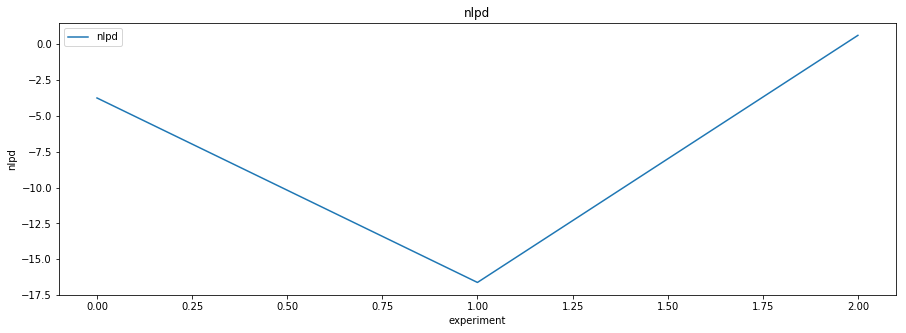

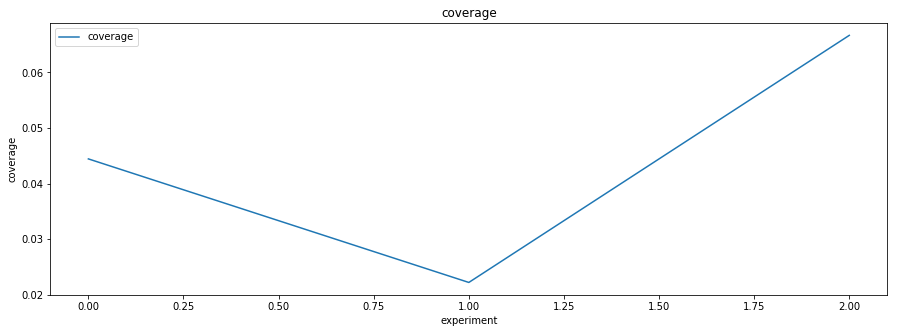

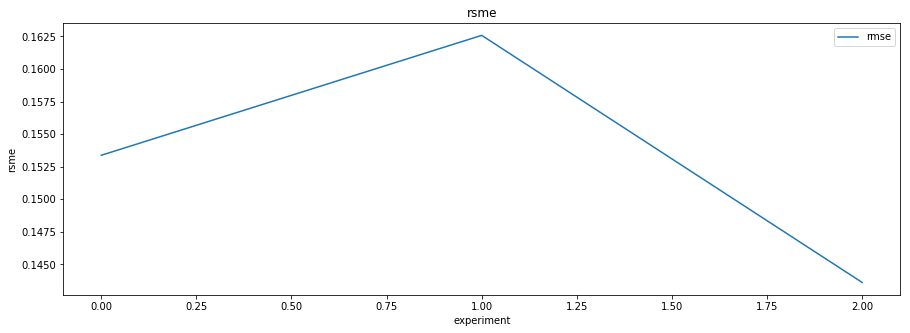

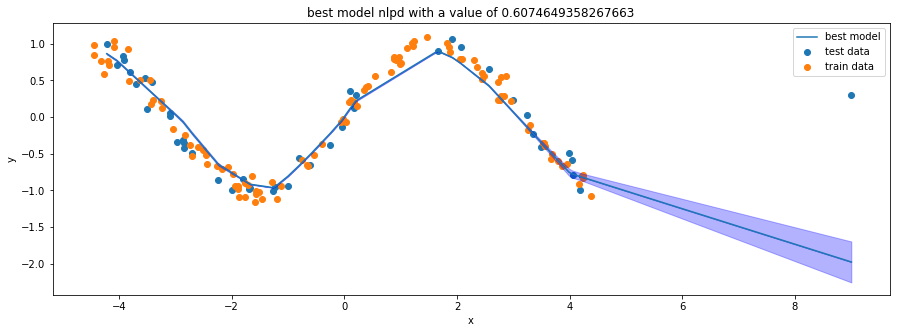

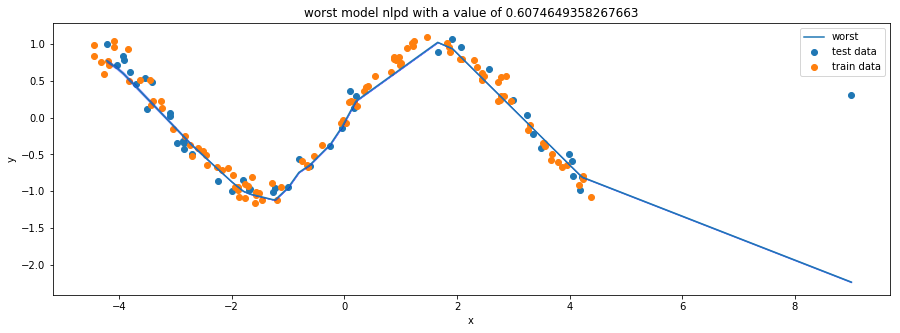

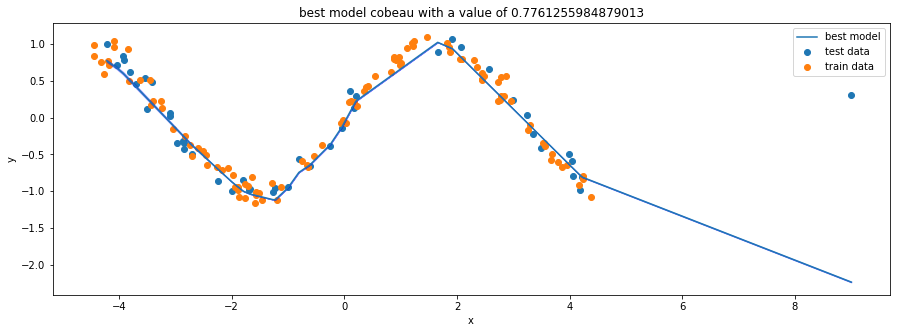

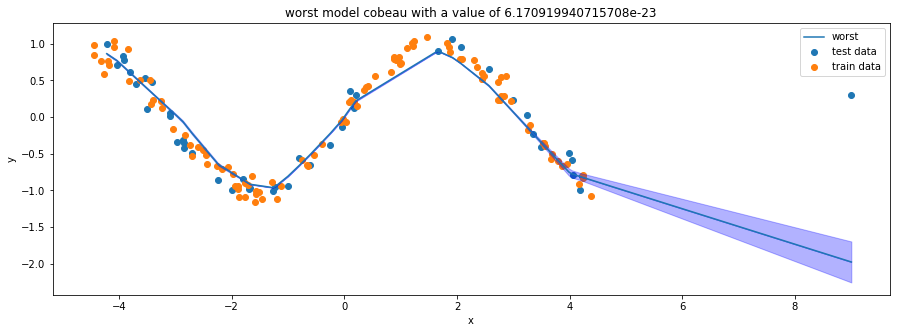

In [9]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-16 14:39:01.567293
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 143.61105585098267 seconds. That means the whole run will probably take 430.833167552948 more seconds and 7.1805527925491335 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 369.4851498603821 seconds with 3 experiments
             cobeau  coverage        nlpd      rsme
count  3.000000e+00  3.000000    3.000000  3.000000
mean   2.117278e-01  0.007407 -107.680655  0.168818
std    3.662429e-01  0.012830   56.121611  0.054975
min    4.526482e-33  0.00

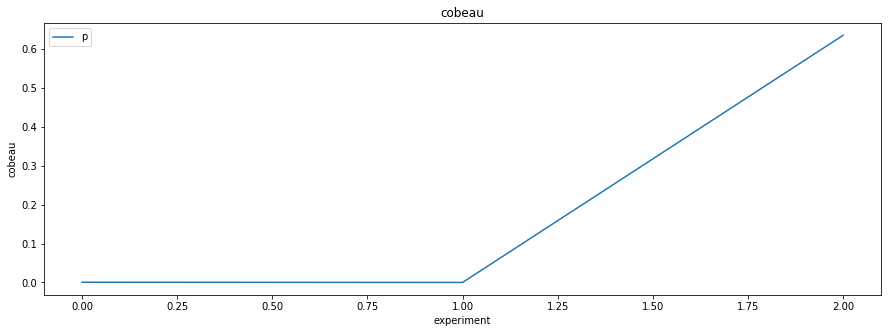

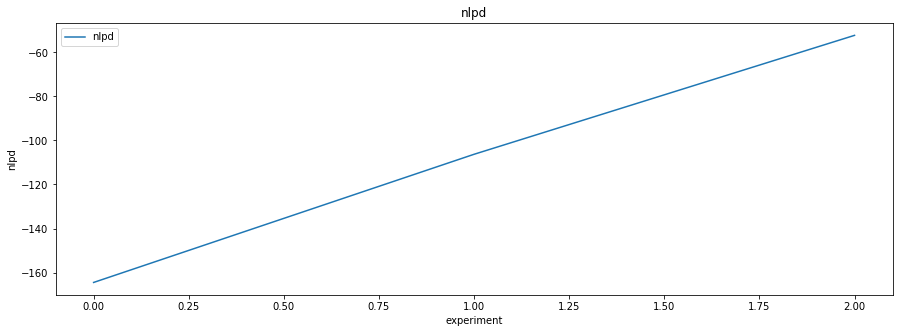

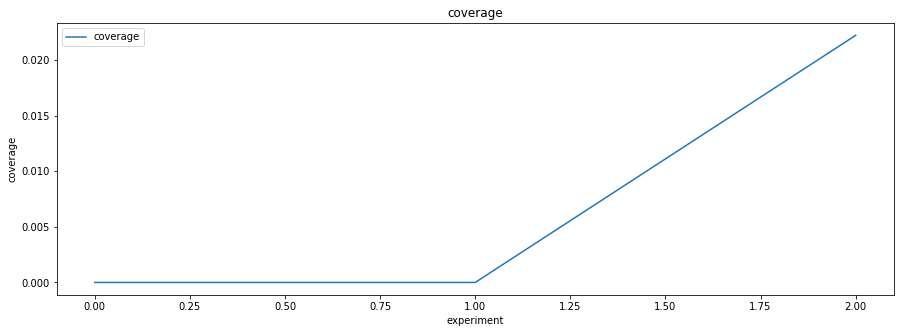

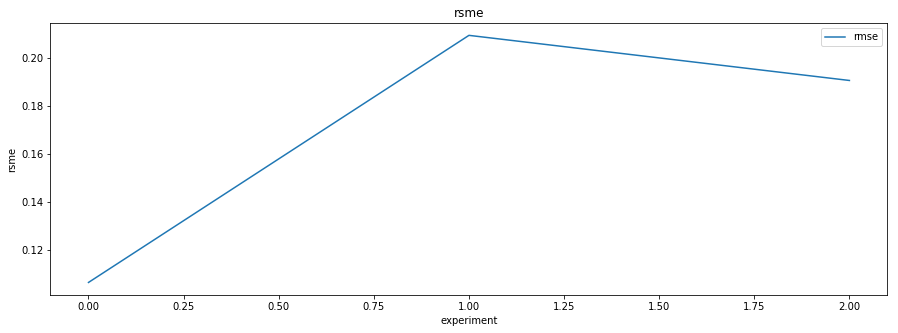

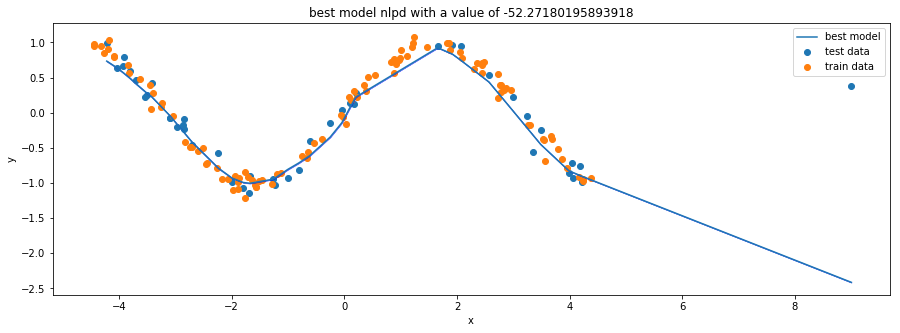

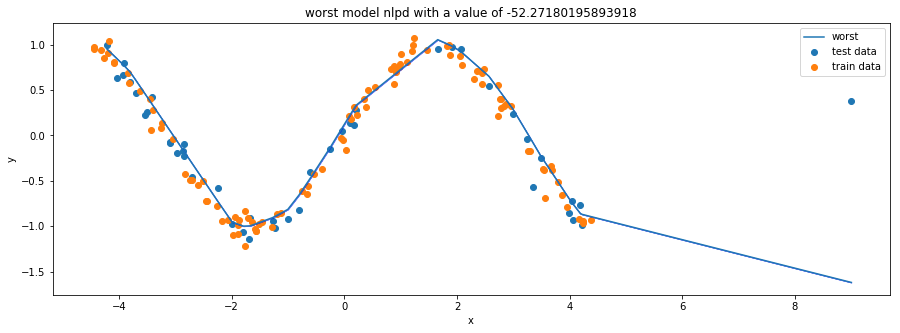

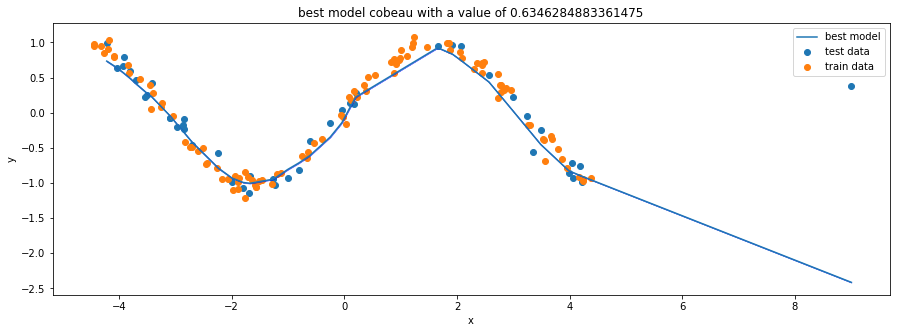

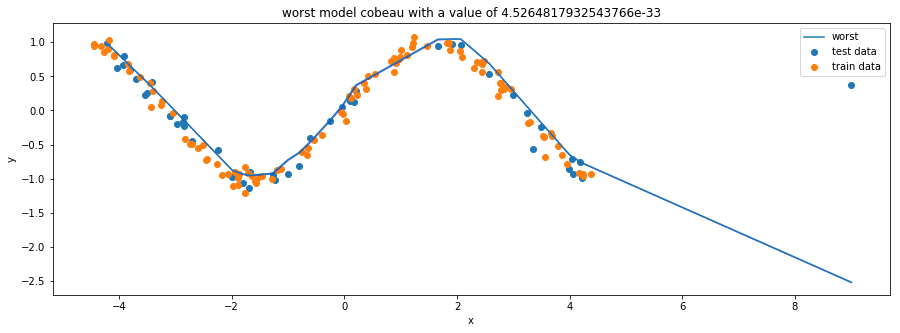

In [10]:
pd44 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [11]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-16 14:45:16.881869
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 36.129509925842285 seconds. That means the whole run will probably take 108.38852977752686 more seconds and 1.8064754962921143 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.Ensembl

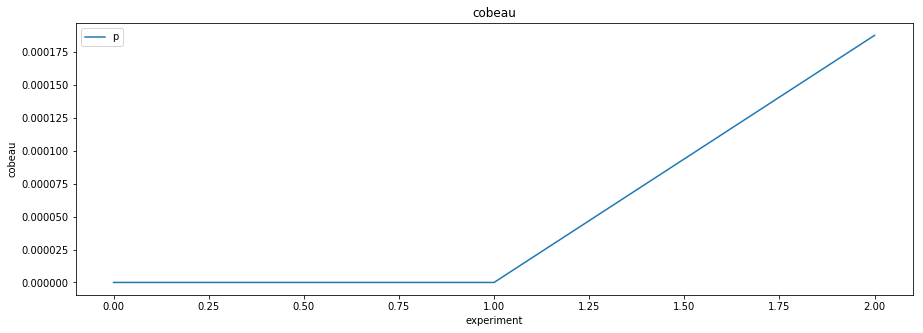

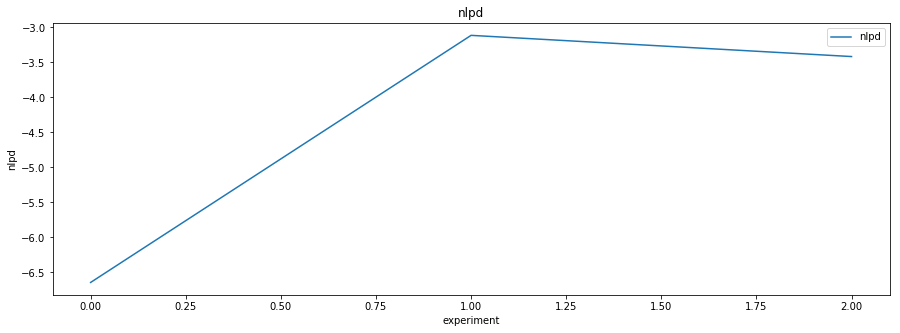

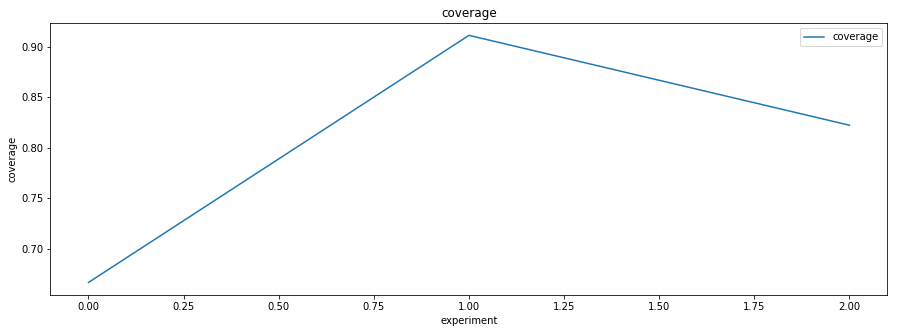

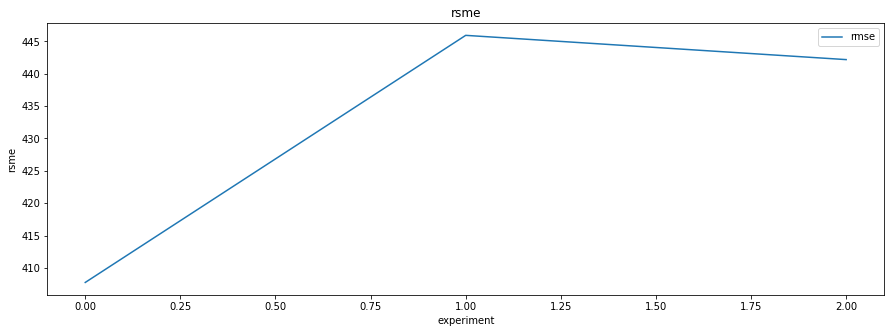

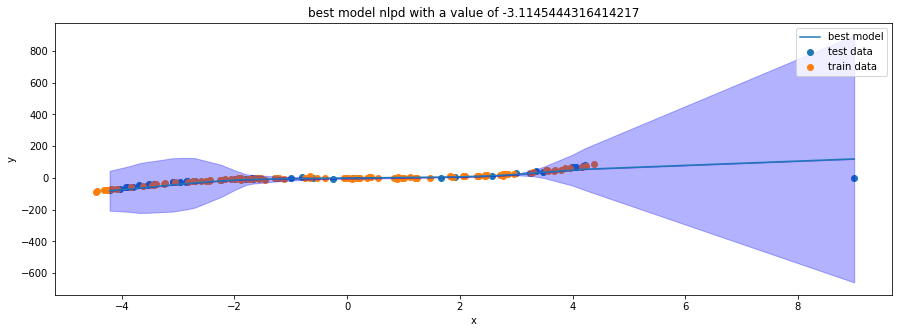

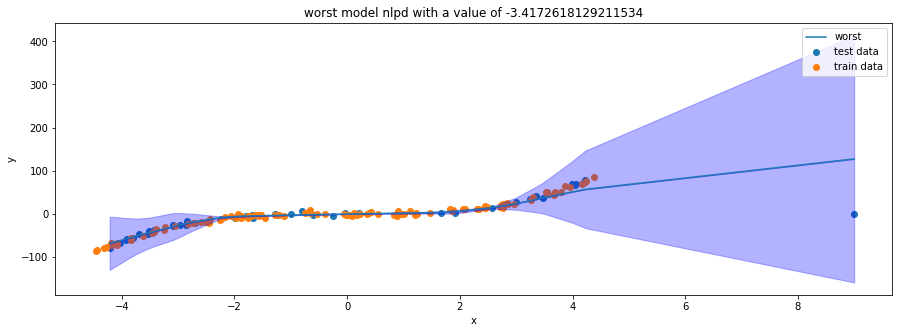

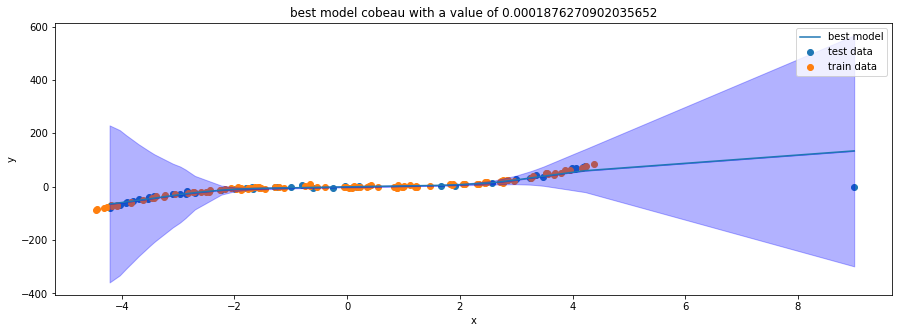

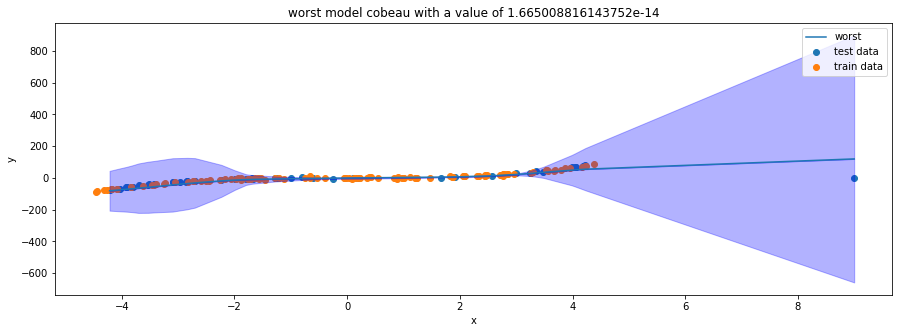

In [12]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-16 14:47:08.047879
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 114.3482518196106 seconds. That means the whole run will probably take 343.0447554588318 more seconds and 5.71741259098053 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 350.73743200302124 seconds with 3 experiments
             cobeau  coverage       nlpd        rsme
count  3.000000e+00  3.000000   3.000000    3.000000
mean   8.646995e-04  0.585185 -17.068946  759.093537
std    1.497704e-03  0.126361  11.697357  182.999395
m

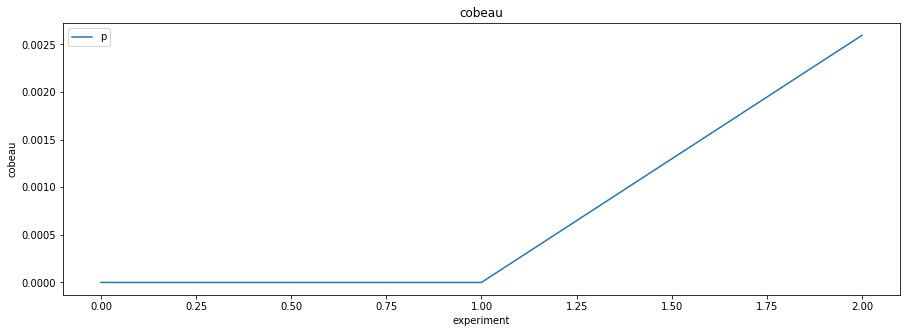

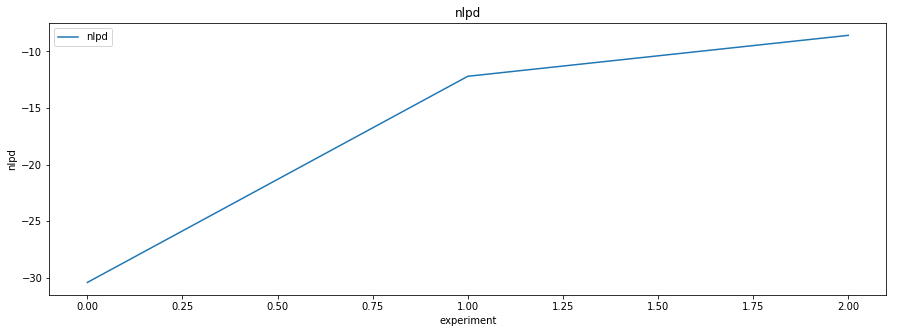

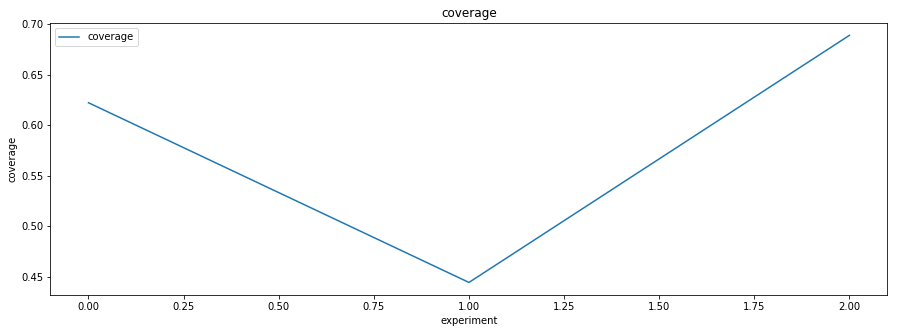

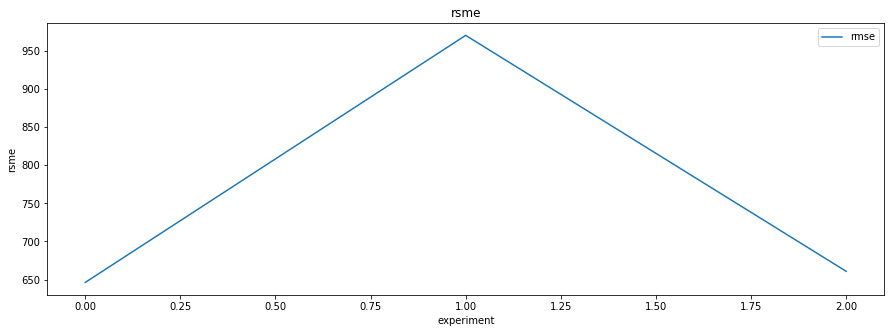

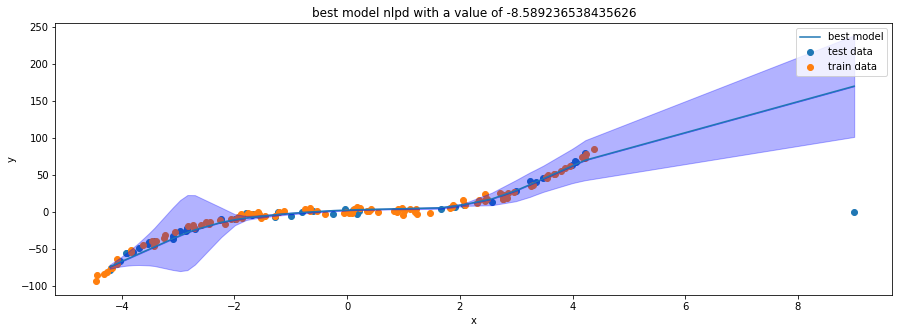

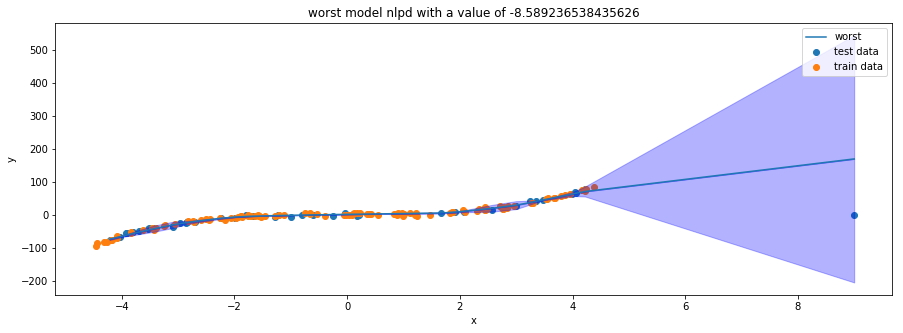

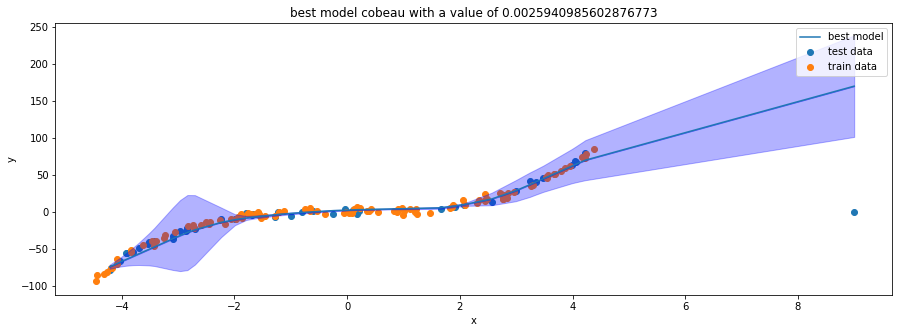

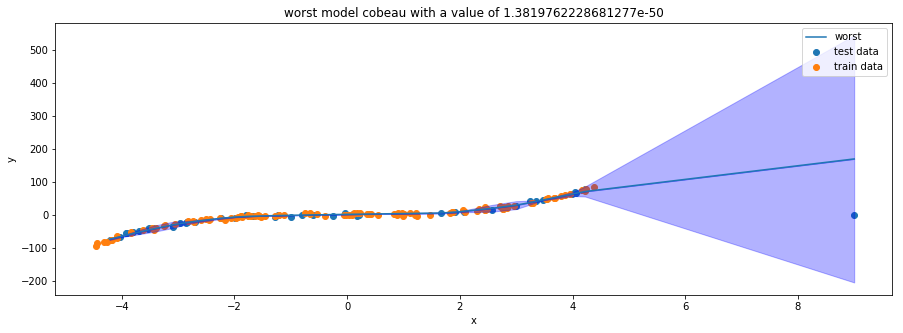

In [13]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-16 14:53:05.355005
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 118.10649514198303 seconds. That means the whole run will probably take 354.3194854259491 more seconds and 5.905324757099152 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 338.18325901031494 seconds with 3 experiments
             cobeau  coverage         nlpd         rsme
count  3.000000e+00  3.000000     3.000000     3.000000
mean   7.881054e-17  0.585185  -541.176336   870.089793
std    1.365039e-16  0.172610   922.4889

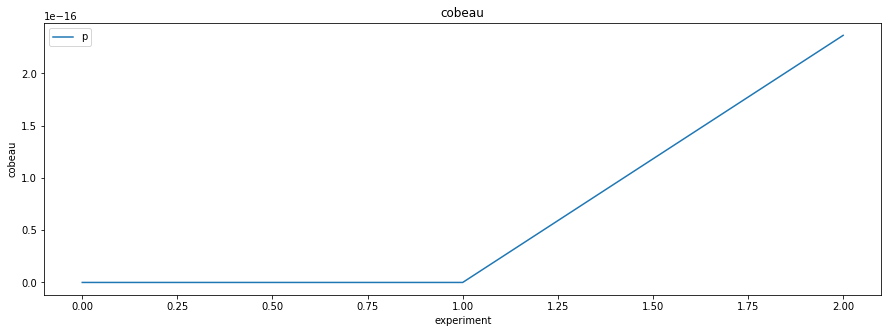

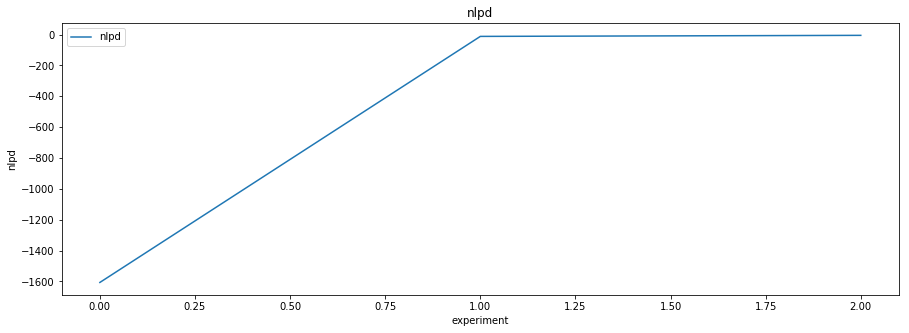

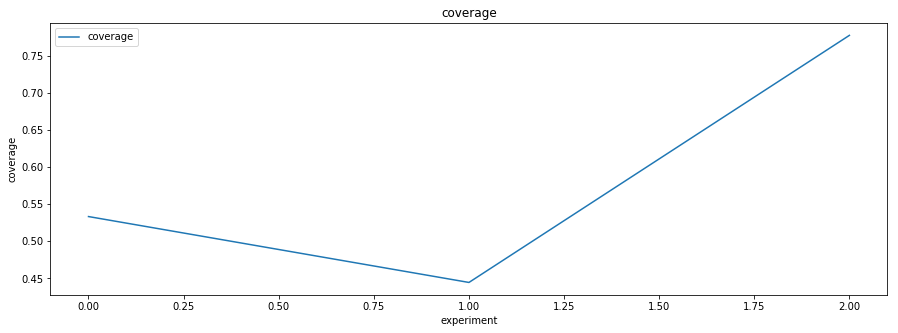

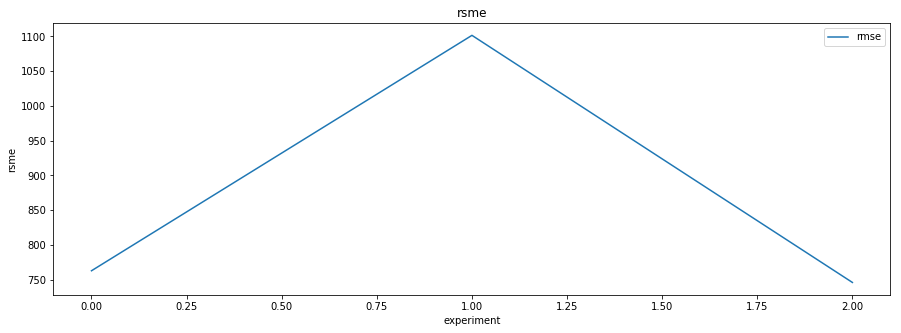

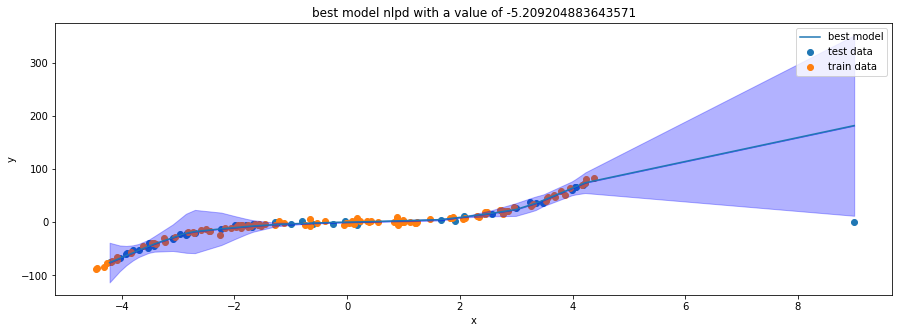

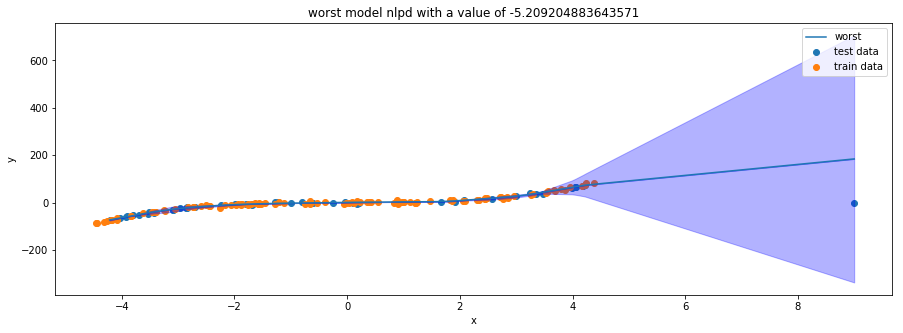

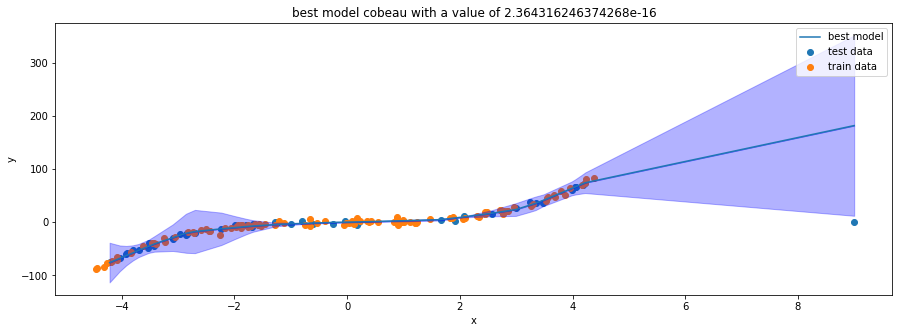

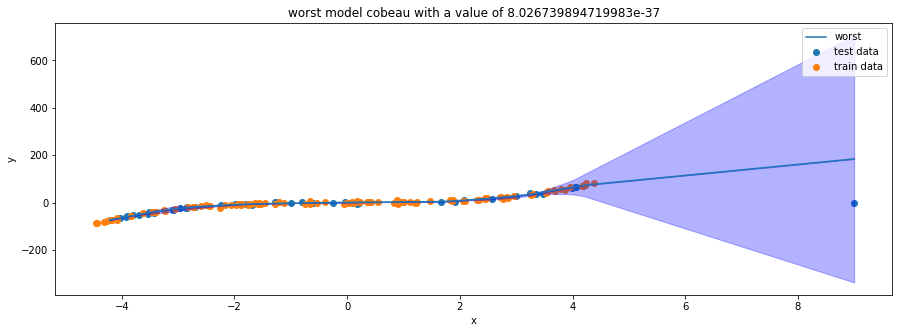

In [14]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-16 14:58:48.611006
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 107.10967779159546 seconds. That means the whole run will probably take 321.3290333747864 more seconds and 5.355483889579773 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 338.9366536140442 seconds with 3 experiments
             cobeau  coverage          nlpd         rsme
count  3.000000e+00  3.000000      3.000000     3.000000
mean   1.908312e-01  0.007407  -5432.938228  1075.355540
std    3.305260e-01  0.012830   4586.762245   212.899587
min  

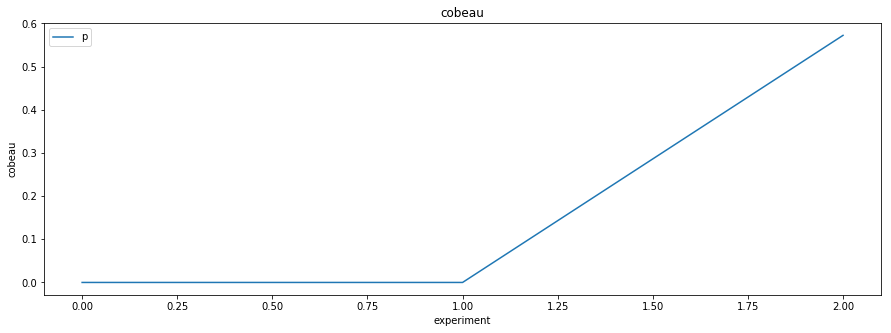

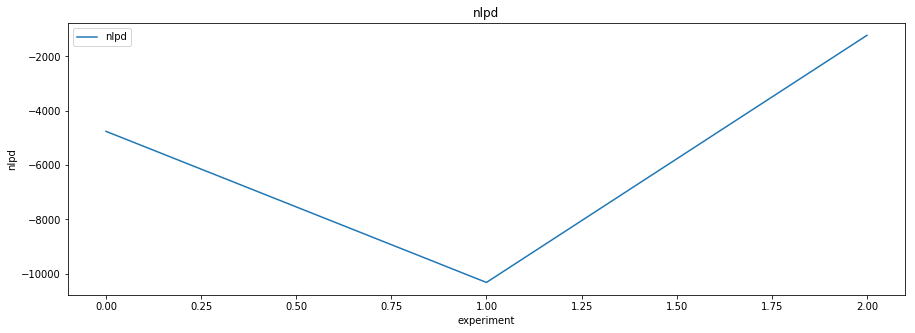

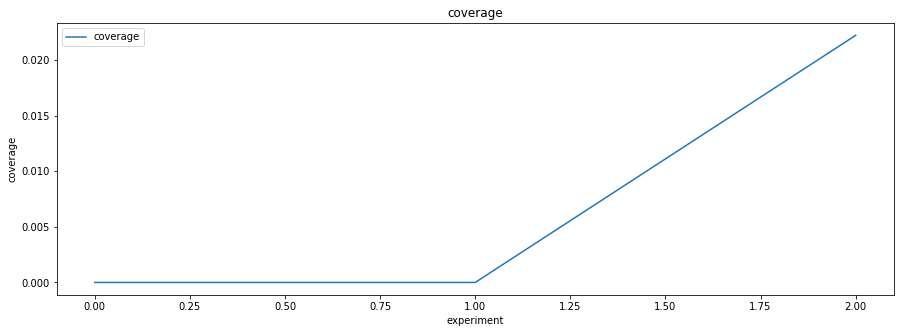

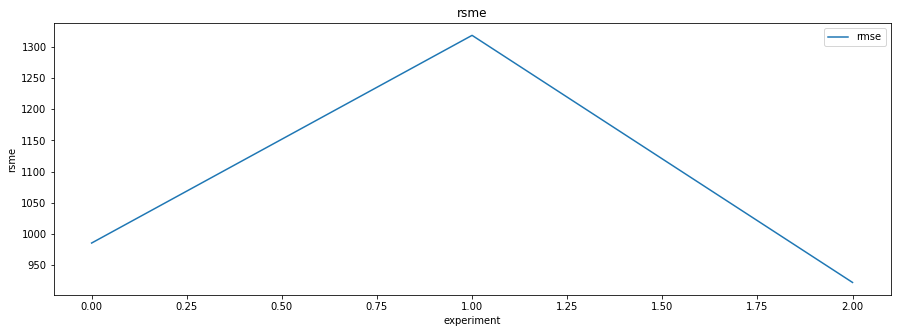

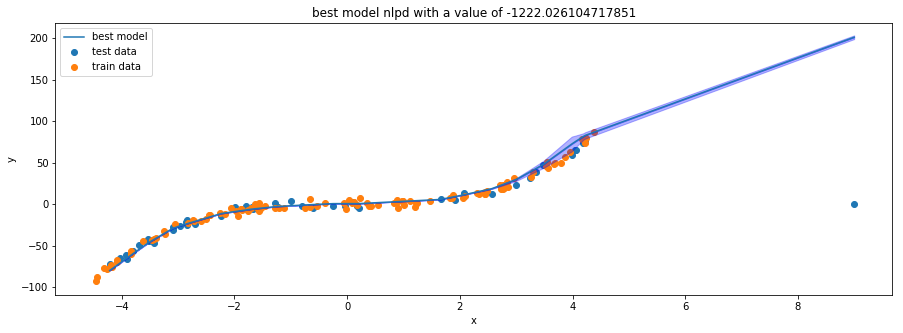

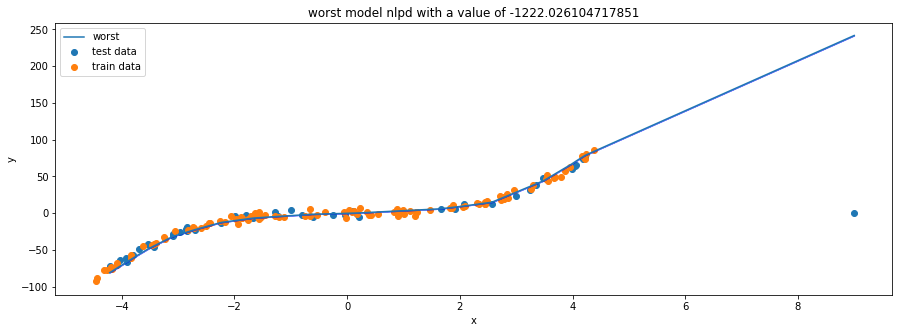

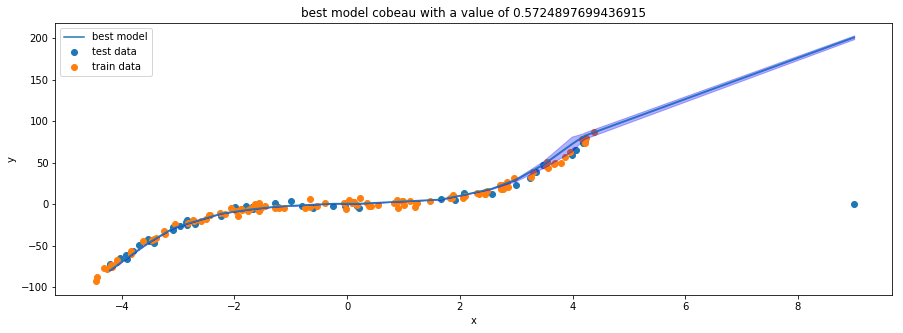

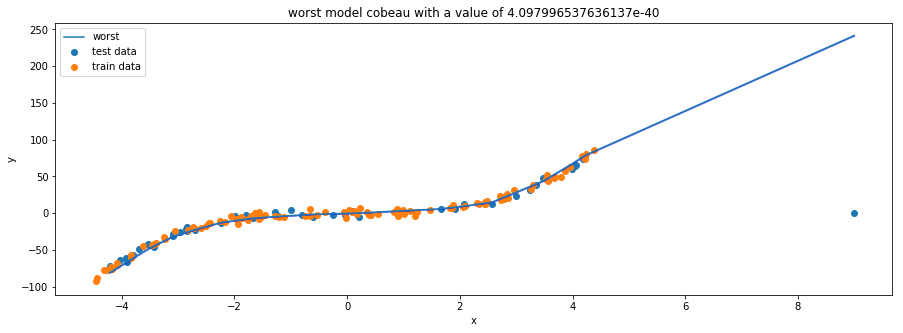

In [15]:
pd444 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)